
## $- \textbf{Burgers equation}$ 

### $\frac{\partial{u}}{{\partial{t}}} + u\frac{\partial{u}}{\partial{x}} = v\frac{\partial{u}^2}{\partial{x}^2}$


## $- \textbf{Convective term (backward in space)}:$

### $\frac{un[i] - un[i-1]}{dx}$

## $- \textbf{Diffusive term (central in space)}:$

### $f'(x) = \frac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}$

### $f''(x) = \frac{f(x + \Delta x) - 2f(x) + f(x - \Delta x)}{{\Delta x}^2}$



# Preprocessing

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [71]:
# Descretization

nt = 1001 # numper of time points
nx = 101 # number of space points

nu = 0.05
#nu = (0.01/math.pi)

dt = 0.001 # time step
#dx = 2/(nx - 1) # space step

x = np.linspace(-1, 1, nx) # space domain

dx = abs(x[1] - x[0])



In [72]:
# Initializing u 
#u = np.zeros(nx)
un = np.zeros(nx)

uf = np.zeros((nt, nx))

u = -np.sin(math.pi * x)

uf[0,:] = u # Initial Condition

# Solving the Equation

In [73]:
for n in range(1, nt): # Loop over time steps(n is the time index)
    un = u.copy() # copy of the solution at the previous time step
    for i in range(1, nx - 1): # Loop over spatial grid points (excluding boundaries)
        u[i] = (un[i] 
        - un[i] * (dt/dx) * (un[i] - un[i-1])   # convention term
        + (nu * dt/(dx**2)) * (un[i+1] - 2 * un[i] + un[i-1])) # diffusion term
        uf[n,i] = u[i] # We store the solution at time step n

# Post-Processing

## Final Solution

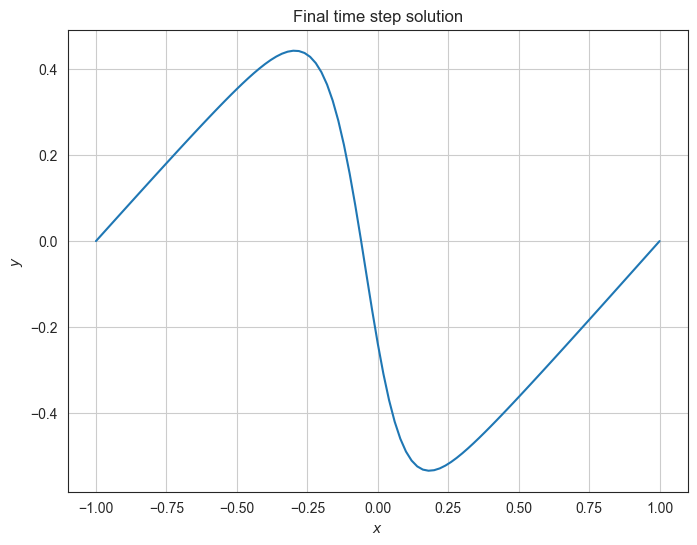

In [74]:
# -----------------------
# Plotting Final Solution
# -----------------------
plt.figure(figsize = (8,6))
plt.plot(x, u, label = "u Solution")
plt.title("Final time step solution")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.grid(True)
plt.show()

## Initial vs Final Solution

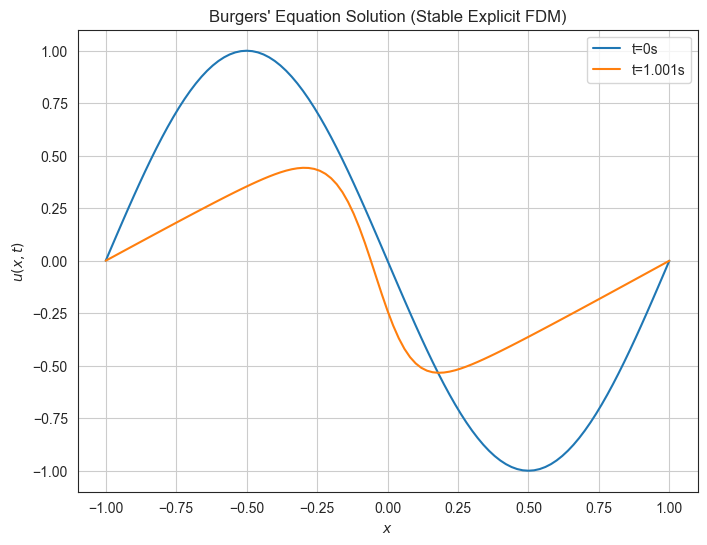

In [75]:
# ---------------------------------
# Ploting initial vs final solution
# ---------------------------------
plt.figure(figsize=(8,6))
plt.plot(x, uf[0,:], label="t=0s")
plt.plot(x, uf[-1,:], label=f"t={nt*dt:.3f}s")
plt.xlabel(r"$x$")
plt.ylabel(r"$u(x,t)$")
plt.title("Burgers' Equation Solution (Stable Explicit FDM)")
plt.grid(True)
plt.legend()
plt.show()

## Heatmap

In [76]:
sns.set_style("white")
plt.figure(figsize = (5,3), dpi = 3000)
sns.heatmap(uf.T, cmap = 'jet')

<Axes: >